# Harmonic Oscillator Lab

This notebook demonstrates some of the analysis tools you will need to complete this lab.

In [1]:
import os
import codecs

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
%matplotlib inline

### Dump the contents of one file to see what it looks like.

There's a 7-row header that we don't care about and we see that the measurements we care about -- time and position -- are in columns 0 and 1.

In [3]:
!head undamped1.txt

### Read the data and subtract off the mean position so the displacement is relative to zero.

In [4]:
filecp = codecs.open('undamped1.txt', encoding='cp1252')
t1, y1 = np.loadtxt(filecp, unpack=True, skiprows=7, usecols=[0, 1])

In [5]:
filecp = codecs.open('undamped2.txt', encoding='cp1252')
t2, y2 = np.loadtxt(filecp, unpack=True, skiprows=7, usecols=[0, 1])

In [6]:
t1

array([  0.  ,   0.05,   0.1 ,   0.15,   0.2 ,   0.25,   0.3 ,   0.35,
         0.4 ,   0.45,   0.5 ,   0.55,   0.6 ,   0.65,   0.7 ,   0.75,
         0.8 ,   0.85,   0.9 ,   0.95,   1.  ,   1.05,   1.1 ,   1.15,
         1.2 ,   1.25,   1.3 ,   1.35,   1.4 ,   1.45,   1.5 ,   1.55,
         1.6 ,   1.65,   1.7 ,   1.75,   1.8 ,   1.85,   1.9 ,   1.95,
         2.  ,   2.05,   2.1 ,   2.15,   2.2 ,   2.25,   2.3 ,   2.35,
         2.4 ,   2.45,   2.5 ,   2.55,   2.6 ,   2.65,   2.7 ,   2.75,
         2.8 ,   2.85,   2.9 ,   2.95,   3.  ,   3.05,   3.1 ,   3.15,
         3.2 ,   3.25,   3.3 ,   3.35,   3.4 ,   3.45,   3.5 ,   3.55,
         3.6 ,   3.65,   3.7 ,   3.75,   3.8 ,   3.85,   3.9 ,   3.95,
         4.  ,   4.05,   4.1 ,   4.15,   4.2 ,   4.25,   4.3 ,   4.35,
         4.4 ,   4.45,   4.5 ,   4.55,   4.6 ,   4.65,   4.7 ,   4.75,
         4.8 ,   4.85,   4.9 ,   4.95,   5.  ,   5.05,   5.1 ,   5.15,
         5.2 ,   5.25,   5.3 ,   5.35,   5.4 ,   5.45,   5.5 ,   5.55,
      

In [7]:
time = t1

In [8]:
y1 = y1 - np.mean(y1)
y2 = y2 - np.mean(y2)

### (Optionally) toss out crummy data.

Imagine you want to toss out all the data you took past six seconds.  We can use np.where!  In this example I'm going to just copy my time and displacement measurements into junk arrays.

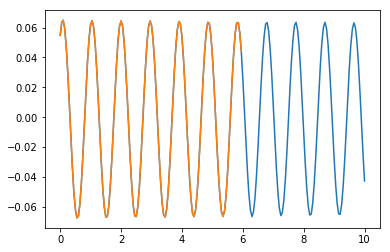

In [9]:
t2junk, y2junk = t2, y2
keep = np.where(t2 < 6.0)[0]
t2junk = t2junk[keep]
y2junk = y2junk[keep]
plt.plot(t2, y2)
plt.plot(t2junk, y2junk)

### Make a quick plot.

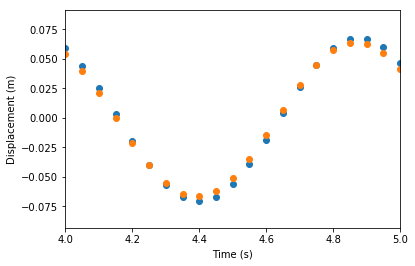

In [10]:
fig, ax = plt.subplots()
ax.scatter(time, y1)
ax.scatter(time, y2)
ax.set_xlim(4, 5)
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('Time (s)')

### Get the average amplitude and the uncertainty in the amplitude at each time based on all the available trials.

In [11]:
yavg = np.zeros_like(y1)
yerr = np.zeros_like(y1)
for ii in range(len(y1)):
    yavg[ii] = np.mean([y1[ii], y2[ii]])
    yerr[ii] = np.std([y1[ii], y2[ii]]) # / np.sqrt(2)

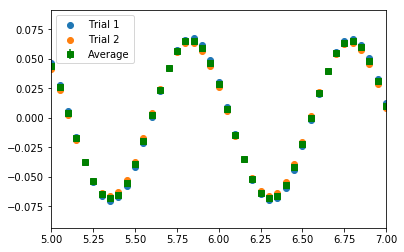

In [12]:
fig, ax = plt.subplots()
ax.scatter(time, y1, label='Trial 1')
ax.scatter(time, y2, label='Trial 2')
ax.errorbar(time, yavg, yerr, color='g', fmt='s', label='Average')
ax.set_xlim(5, 7)
ax.legend(loc='upper left')

### Fit for the best-fitting parameter values and uncertainties.

In [13]:
def shm(time, A, omega, gamma):
    ymodel = A * np.cos(omega * time - gamma)
    return ymodel

In [14]:
param, pcov = curve_fit(shm, time, yavg, sigma=yerr, p0=[0.06, 2*np.pi/1.0, 0.5])
perr = np.sqrt(np.diag(pcov)) # this is the diagonal of the covariance matrix scaled by the chi^2
print(param, perr)

[ 0.06706253  6.56214684  0.54803457] [ 0.00051158  0.00055374  0.00769219]


In [15]:
ymodel = shm(time, param[0], param[1], param[2])

#### Scale the parameter uncertainties by the reduced chi^2.

In [16]:
chisq = np.sum( (yavg - ymodel)**2 / yerr**2 ) / (len(yavg) - 3)
print(chisq)
perr_scaled = perr * np.sqrt(chisq)

17.0213641833


In [17]:
print(param, perr_scaled)

[ 0.06706253  6.56214684  0.54803457] [ 0.00211064  0.00228456  0.03173564]


### Make a plot with the best-fitting model.

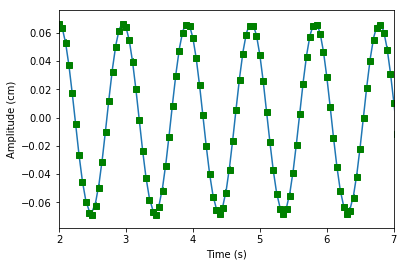

In [18]:
fig, ax = plt.subplots()
ax.errorbar(time, yavg, yerr, color='g', fmt='s')
ax.plot(time, ymodel)
ax.set_xlim(2, 7)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (cm)')